In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [93]:
df = pd.read_csv('salary_data_cleaned.csv')
## more cleaning - part 1
df.drop(columns='Job_state', inplace=True)
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)
salary_filter = df['Salary Estimate'].apply(lambda x: x.replace('(Glassdoor est.)', ''))
salary_filter = salary_filter.apply(lambda x: x.replace('K', '').replace('$', ''))
salary_filter = salary_filter.apply(lambda x: x.lower().replace('employer provided salary:', '').replace('(employer est.)', '').replace(' per hour', ''))
df['min_salary'] = salary_filter.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = salary_filter.apply(lambda x: int(x.split('-')[1]))

In [94]:
## more cleaning - part 2
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
### Do following tasks (some are feature engineering)
## Job title and seniority 

##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

In [112]:
### Cleaning
##  Fix state Los Angeles 
df['Job_State'] = df['Job_State'].apply(lambda x: x.strip() if x != 'Los Angeles' else 'CA')
df[df['Job_State'] == 'CA'] # filtering rows with a specific criteria
df['Job_State'].value_counts()

### Feature Engineering
## Job title and seniority 
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)
##  Job description length 
df['desc_len'] = df['Job_Description'].apply(lambda x: len(x))
## Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')))

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
UT     10
WI     10
AZ      9
MO      9
AL      8
GA      6
KY      6
DE      6
MI      6
IA      5
CT      5
NE      4
OR      4
LA      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job_State, dtype: int64

In [96]:
## hourly wage to annual
# df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['hourly'] == 1 else x['min_salary'], axis=1)
# df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['hourly'] == 1 else x['max_salary'], axis = 1)
df[['hourly', 'min_salary', 'max_salary']][df['hourly'] == 1]

,hourly,min_salary,max_salary
165,1,17,24
177,1,21,34
197,1,18,25
202,1,21,34
210,1,15,25
246,1,17,24
271,1,21,34
337,1,18,25
345,1,24,39
357,1,21,34


In [97]:
df[['job_simp', 'min_salary']]
pd.pivot_table(df, index=['job_simp', 'seniority'], values='Average Salary').sort_values('Average Salary', ascending = False)

Average Salary
job_simp       seniority                
director       na             168.607143
mle            senior         142.071429
data scientist senior         138.956522
data engineer  senior         124.689189
mle            na             119.133333
na             senior         109.061404
data scientist na             107.043011
               jr             106.500000
data engineer  na              96.701220
manager        na              84.022727
analyst        senior          79.092593
na             na              73.988189
analyst        na              61.155405
               jr              56.500000

### Histograms (works on a SERIES)

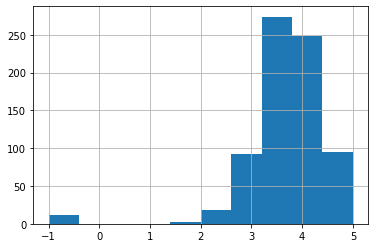

In [98]:
df['Rating'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002465D251130>,
      dtype=object)

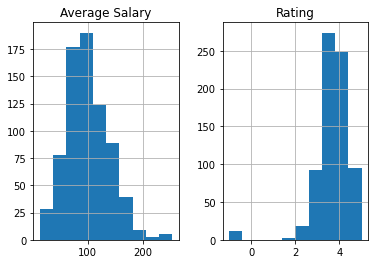

In [99]:
df[['Average Salary', 'Rating']].hist()

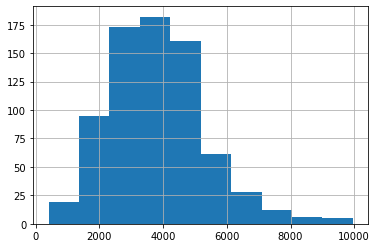

In [100]:
df['Location'].value_counts()[:5]
df['desc_len'].hist()

### Box Plots (works on a DATAFRAME)

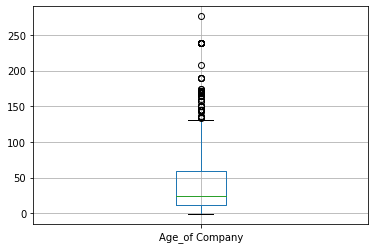

In [101]:
df.boxplot(column=['Age_of Company'])

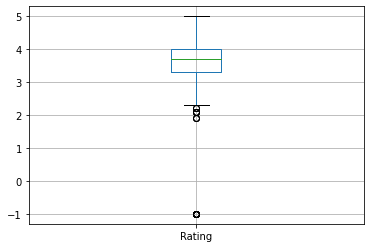

In [102]:
df.boxplot(column='Rating')

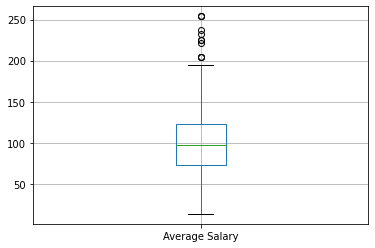

In [103]:
df.boxplot('Average Salary')

### Correlation (works on a DATAFRAME)
Continuos Variables (first)
Categorical Variables (next)

In [104]:
## Correlation
# Continuos variables

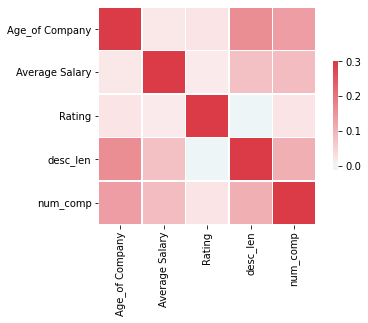

In [105]:
#df[['Average Salary','Job Title', 'Rating']].corr()
cmap=sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Age_of Company', 'Average Salary','Rating', 'desc_len', 'num_comp']].corr(), vmax=.3, center=0,
           cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Bar Plots (using Seaborn)

Graph for Size: Total = 9


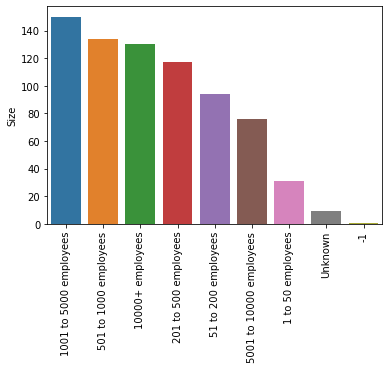

Graph for Type of ownership: Total = 11


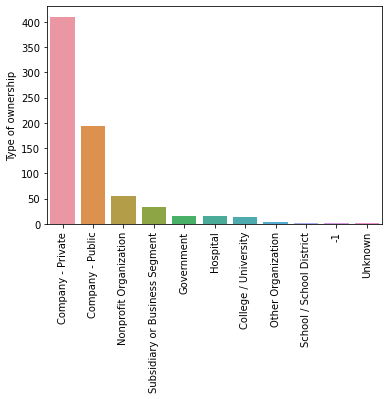

Graph for Industry: Total = 60


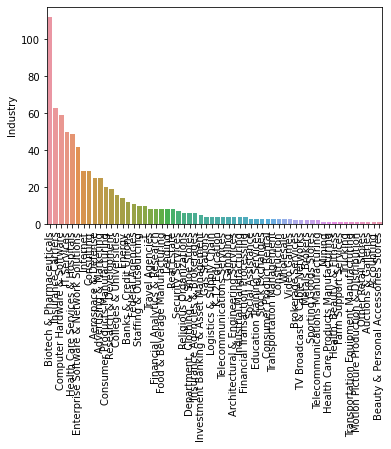

Graph for Sector: Total = 25


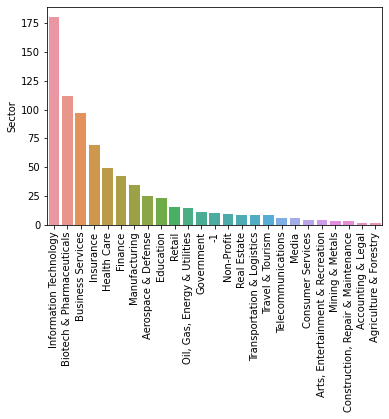

Graph for Revenue: Total = 14


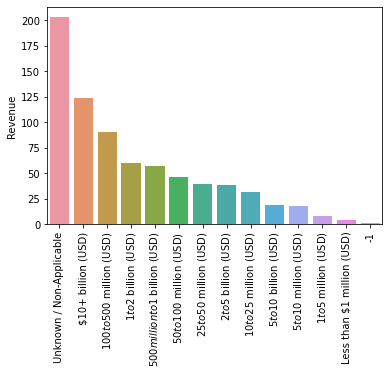

Graph for Average Salary: Total = 225


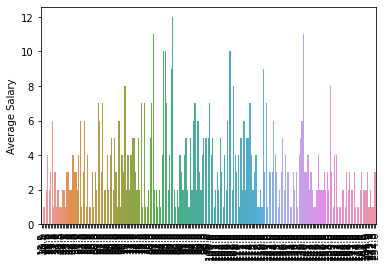

Graph for Company_Name: Total = 343


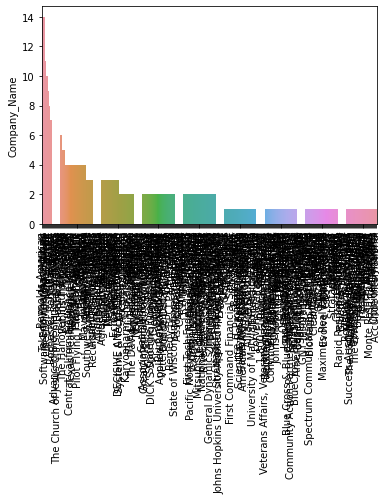

Graph for Job_State: Total = 38


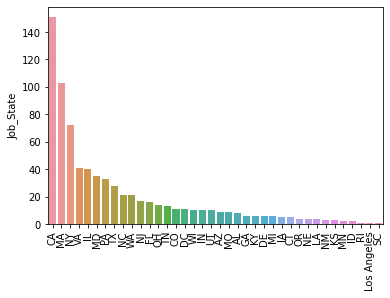

Graph for Same_State: Total = 2


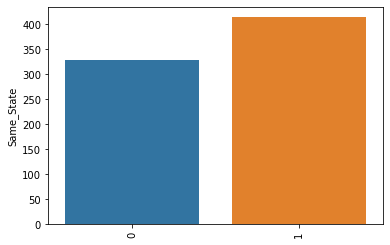

Graph for python_yn: Total = 2


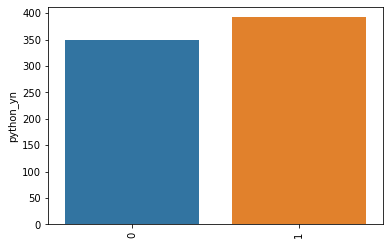

Graph for R_yn: Total = 2


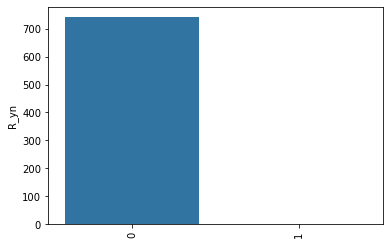

Graph for spark: Total = 2


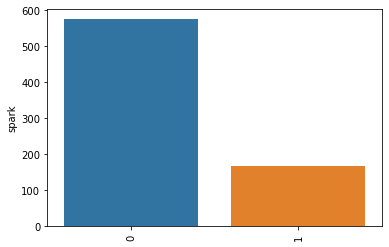

Graph for aws: Total = 2


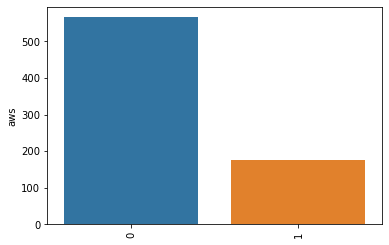

Graph for excel: Total = 2


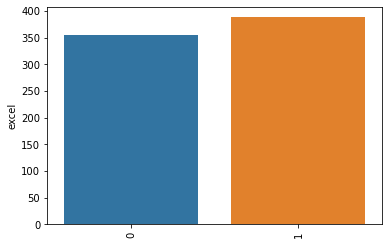

Graph for job_simp: Total = 7


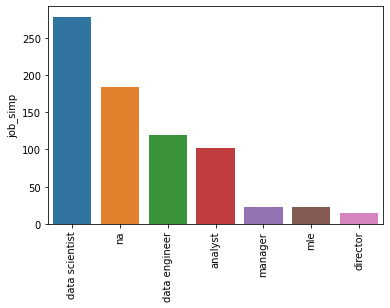

Graph for seniority: Total = 3


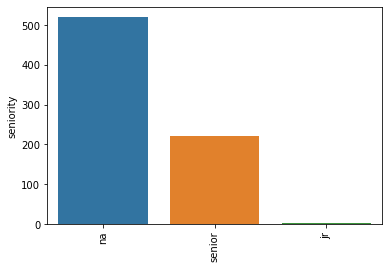

In [106]:
df_cat = df[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Salary', 'Company_Name', 'Job_State', 'Same_State', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]
# -> df['Rating'].value_counts().index
for i in df_cat.columns:
    axis = df_cat[i].value_counts()
    print("Graph for %s: Total = %d" % (i, len(axis)))
    chart = sns.barplot(x=axis.index, y=axis)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: Total = 20


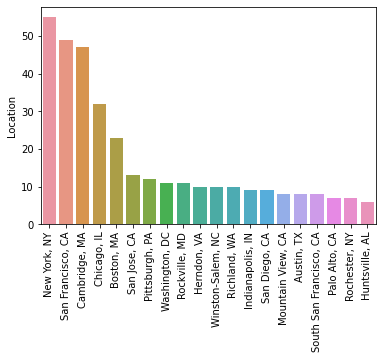

Graph for Headquarters: Total = 20


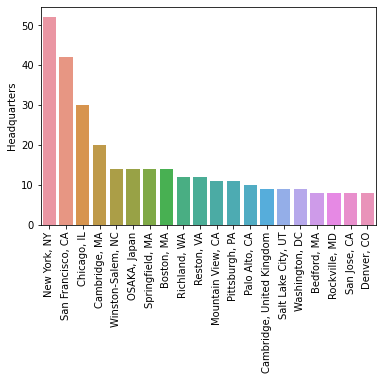

Graph for Company_Name: Total = 20


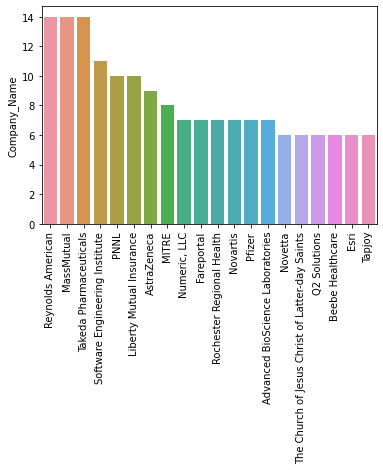

In [107]:
for i in df[['Location', 'Headquarters', 'Company_Name']].columns:
    axis = df[i].value_counts()[:20]
    print("Graph for %s: Total = %d" % (i, len(axis)))
    chart = sns.barplot(x=axis.index, y=axis)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

### PIVOT TABLES

In [108]:
# for pivot_tables the default aggregation function is 'Average'
pd.pivot_table(df, index='job_simp', values = 'Average Salary').sort_values('Average Salary', ascending=False)

,Average Salary
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,84.853261
manager,84.022727
analyst,65.857843


In [109]:
pd.pivot_table(df, index=['Job_State', 'job_simp'], values='Average Salary').sort_values('Job_State', ascending=False)
pd.pivot_table(df, index=['job_simp', 'Job_State'], values='Average Salary').sort_values(['job_simp', 'Average Salary'], ascending=False)

Average Salary
job_simp       Job_State                  
na             AZ               124.500000
               MA               107.478261
               KY               103.500000
               CA                99.907407
               WA                97.500000
               OH                91.166667
               NC                90.916667
               MD                88.750000
               NJ                82.500000
               NY                81.583333
               GA                80.000000
               VA                79.300000
               PA                76.062500
               MO                72.333333
               IN                69.000000
               CT                62.500000
               SC                60.500000
               IL                57.166667
               WI                54.000000
               AL                43.750000
               TX                41.285714
               NE                41.000000
               CO                31.500000
               DE                27.500000
               LA                20.000000
mle            CA               177.300000
               IL               133.000000
               NY               125.000000
               PA               120.500000
               CO               100.500000
               KS                87.000000
               VA                87.000000
manager        PA               109.666667
               NJ               109.500000
               MI                87.500000
               CA                80.611111
               MA                71.900000
               MO                40.500000
director       IL               221.750000
               NJ               161.500000
               MA               117.833333
data scientist DC               149.000000
               CA               143.044776
               UT               140.500000
               MO               127.666667
               IL               117.233333
               NC               117.000000
               NY               115.250000
               MA               113.750000
               WI               113.500000
               PA               113.333333
               MD               109.115385
               CO               108.666667
               VA               108.416667
               Los Angeles      107.500000
               NJ               106.875000
               MI               106.625000
               OH               105.285714
               TX               100.730769
               WA                99.764706
               OR                98.500000
               FL                97.357143
               TN                96.000000
               IN                84.500000
               CT                84.000000
               KY                84.000000
               GA                81.333333
               NM                74.333333
               AZ                69.500000
data engineer  CA               129.540000
               IN               114.500000
               TX               113.062500
               NJ               112.000000
               MD               109.000000
               MA               107.291667
               NC               104.250000
               IA               102.833333
               TN               100.950000
               UT               100.333333
               CO                99.000000
               VA                96.900000
               IL                96.125000
               MN                95.000000
               FL                91.833333
               PA                91.500000
               NY                86.375000
               DC                85.000000
               AZ                79.500000
               OR                73.000000
               LA                70.500000
               AL                65.000000
analyst        RI            

In [110]:
pd.pivot_table(df, index=['job_simp', 'Job_State'], values='Average Salary', aggfunc='count').sort_values(['job_simp', 'Average Salary'], ascending=False)

Average Salary
job_simp       Job_State                  
na             MA                       46
               CA                       27
               MD                       16
               NC                       12
               NY                       12
               PA                        8
               TX                        7
               DE                        6
               IL                        6
               VA                        5
               IN                        4
               KY                        4
               NE                        4
               WI                        4
               CO                        3
               CT                        3
               GA                        3
               MO                        3
               OH                        3
               AL                        2
               AZ                        2
               LA                        1
               NJ                        1
               SC                        1
               WA                        1
mle            PA                        7
               CA                        5
               KS                        3
               IL                        2
               NY                        2
               VA                        2
               CO                        1
manager        CA                        9
               MA                        5
               PA                        3
               MI                        2
               NJ                        2
               MO                        1
director       IL                        6
               MA                        6
               NJ                        2
data scientist CA                       67
               NY                       40
               MA                       30
               VA                       18
               WA                       17
               IL                       15
               MD                       13
               TX                       13
               FL                        7
               OH                        7
               PA                        6
               DC                        5
               MI                        4
               NJ                        4
               CO                        3
               GA                        3
               MO                        3
               NC                        3
               NM                        3
               OR                        3
               UT                        3
               WI                        3
               CT                        2
               IN                        2
               KY                        2
               AZ                        1
               Los Angeles               1
               TN                        1
data engineer  CA                       25
               MA                       12
               TN                       10
               VA                       10
               IL                        8
               TX                        8
               NC                        6
               AZ                        5
               DC                        4
               IN                        4
               NY                        4
               CO                        3
               FL                        3
               IA                        3
               MD                        3
               UT                        3
               LA                        2
               NJ                        2
               AL                        1
               MN                        1
               OR                        1
               PA                        1
analyst        CA            

In [114]:
pd.pivot_table(df[df['job_simp']=='data scientist'], index='Job_State', values='Average Salary').sort_values('Average Salary', ascending=False)

,Average Salary
Job_State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [126]:
# Salary #Vs ...
# Rating
# Industry
# Sector
# Revenue
# no of competitor
# hourly
# employer_provided
# python
# r
# spark
# aws
# excel
# desc_len
# Type of ownership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'employer_provided', 
             'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'Type of ownership', 'Average Salary' ]]

for col in df_pivots.columns:
    if col != 'Average Salary':
        print(col)
        print(pd.pivot_table(df_pivots, index=col, values='Average Salary').sort_values('Average Salary', ascending=False))


Rating
        Average Salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          Average Salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

In [132]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='Average Salary')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),80.875000,119.843750
$10+ billion (USD),102.393939,129.698276
$100 to $500 million (USD),67.319149,100.068182
$2 to $5 billion (USD),79.000000,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111
